In [ ]:
import nltk
import pandas as pd

In [ ]:
# nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df = pd.read_csv("sample_data/semantic_attack_examples.csv")

In [ ]:
df.head()

,id,original_sentence,attack_sentence,sentiment
0,1,"Cardona slowed her vehicle , turned [[around]]...","Cardona slowed her vehicle , turned [[roughly]...",2
1,2,Both [[operating]] [[profit]] and net sales fo...,Both [[operations]] [[revenues]] and net sales...,0
2,3,Tampere Science Parks is a Finnish company tha...,Tampere Science Parks is a Finnish company tha...,2
3,4,The real estate company posted a net [[loss]] ...,The real estate company posted a net [[losing]...,1
4,5,The Oxyview Pulse Oximeter is a common device ...,The Oxyview Pulse Oximeter is a common device ...,2


In [ ]:
l = df.values.tolist()

In [ ]:
l[0]

[1,
 'Cardona slowed her vehicle , turned [[around]] and [[returned]] to the intersection , where she called 911',
 'Cardona slowed her vehicle , turned [[roughly]] and [[reverting]] to the intersection , where she called 911',
 2]

In [ ]:
text = []
for i in l:
  text.append(i[1])

In [ ]:
text[:5]

['Cardona slowed her vehicle , turned [[around]] and [[returned]] to the intersection , where she called 911',
 'Both [[operating]] [[profit]] and net sales for the three-month [[period]] [[increased]] , respectively from EUR16 .0 m and EUR139m , as compared to the corresponding quarter in 2006',
 'Tampere Science Parks is a Finnish company that owns , [[leases]] and [[builds]] office properties and it [[specialises]] in [[facilities]] for technology-oriented [[businesses]]',
 'The real estate company posted a net [[loss]] of +ó  x201a -¼ 59.3 million +ó  x201a -¼ 0.21 per share compared with a net [[profit]] of +[[ó]]  x201a -¼ 31 million +ó  x201a -¼ 0.11 per share for the corresponding quarter of 2007',
 'The Oxyview Pulse Oximeter is a common device to [[check]] [[patient]] blood-oxygen saturation [[level]] and pulse [[rate]]']

In [ ]:
dic = {}
for sentence in text:
  tag = nltk.pos_tag(nltk.word_tokenize(sentence))
  # print(tag)
  for i in range(len(tag)-1):
    if tag[i][0] == '[' and tag[i+1][0] == '[':
      # word = tag[i+2][0]
      # print(word)
      pos = tag[i+2][1]
      if pos not in dic:
        dic[pos] = 1
      else:
        dic[pos] += 1

In [ ]:
dic

{'CD': 19,
 'DT': 14,
 'FW': 1,
 'IN': 17,
 'JJ': 86,
 'JJR': 3,
 'JJS': 5,
 'MD': 1,
 'NN': 313,
 'NNP': 120,
 'NNPS': 1,
 'NNS': 96,
 'PRP': 1,
 'RB': 39,
 'VB': 7,
 'VBD': 164,
 'VBG': 37,
 'VBN': 27,
 'VBP': 14,
 'VBZ': 32}

In [ ]:
sorted_dic = sorted(dic.items(), key = lambda x:x[1],reverse=True)
sorted_dic

[('NN', 313),
 ('VBD', 164),
 ('NNP', 120),
 ('NNS', 96),
 ('JJ', 86),
 ('RB', 39),
 ('VBG', 37),
 ('VBZ', 32),
 ('VBN', 27),
 ('CD', 19),
 ('IN', 17),
 ('DT', 14),
 ('VBP', 14),
 ('VB', 7),
 ('JJS', 5),
 ('JJR', 3),
 ('MD', 1),
 ('PRP', 1),
 ('NNPS', 1),
 ('FW', 1)]

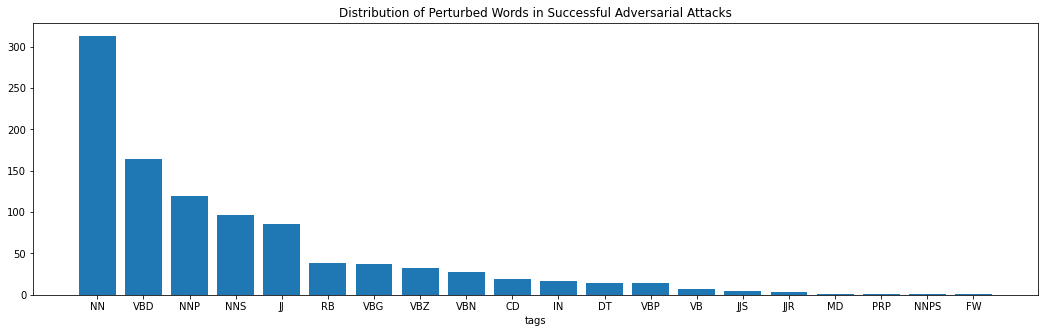

In [ ]:
import matplotlib.pyplot as plt
names = [i[0] for i in sorted_dic]
values = [i[1] for i in sorted_dic]
# values = list(sorted_dic.values())
f, ax = plt.subplots(figsize=(18,5))
plt.title("Distribution of Perturbed Words in Successful Adversarial Attacks")
plt.bar(range(len(names)), values, tick_label=names)
plt.xlabel('tags')
# ax.legend(fontsize = 14)
plt.show()
